<a href="https://colab.research.google.com/gist/tyty9798123/d7d01095ceb081ff7ad45cbdd479ec6d/network_traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料準備

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../../data/raw/campus_dataset.csv", sep=";")

## 資料處理

In [5]:
# Convert 'clock' from Unix timestamp to datetime in UTC
df['clock'] = pd.to_datetime(df['clock'], unit='s', utc=True)

# Convert timezone from UTC to 'America/Fortaleza'
df['clock'] = df['clock'].dt.tz_convert('America/Fortaleza')

# Display the updated DataFrame
df = df[::-1]

In [7]:
df_new = df.copy()
# Convert 'clock' to datetime, considering the timezone
df_new['clock'] = pd.to_datetime(df_new['clock'])

## 遺失值處理

In [9]:
#總資料數量是4319，所以資料數量正確。

In [10]:
import pandas as pd

# 假設 df 是您的 DataFrame
# 檢查 value_min, value_avg, value_max 欄位的缺失值
missing_value_min = df['value_min'].isnull().sum()
missing_value_avg = df['value_avg'].isnull().sum()
missing_value_max = df['value_max'].isnull().sum()

print(f"Missing values in 'value_min': {missing_value_min}")
print(f"Missing values in 'value_avg': {missing_value_avg}")
print(f"Missing values in 'value_max': {missing_value_max}")

Missing values in 'value_min': 0
Missing values in 'value_avg': 0
Missing values in 'value_max': 0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 df 是您的 DataFrame
# 進行統計描述
print(df[['value_min', 'value_avg', 'value_max']].describe())

# 繪製盒形圖來檢視異常值
"""
plt.figure(figsize=(10, 6))
df[['value_min', 'value_avg', 'value_max']].boxplot()
plt.title('Boxplot for Value Columns')
plt.show()
"""

          value_min     value_avg     value_max
count  4.319000e+03  4.319000e+03  4.319000e+03
mean   5.089641e+07  7.222920e+07  1.015086e+08
std    7.453512e+07  9.041512e+07  1.052077e+08
min    0.000000e+00  2.317100e+05  1.199168e+06
25%    7.362120e+05  4.980221e+06  1.697335e+07
50%    3.461080e+06  1.402334e+07  3.874865e+07
75%    9.415164e+07  1.460435e+08  2.120550e+08
max    2.607175e+08  3.231743e+08  6.978765e+08


"\nplt.figure(figsize=(10, 6))\ndf[['value_min', 'value_avg', 'value_max']].boxplot()\nplt.title('Boxplot for Value Columns')\nplt.show()\n"

# 資料分析

In [12]:
# Calculate day of the week from 'clock', 0 is Monday and 6 is Sunday
df_new['weekday'] = df_new['clock'].dt.dayofweek

# Group by weekday and calculate mean for each value
weekly_avg = df_new.groupby('weekday').mean()

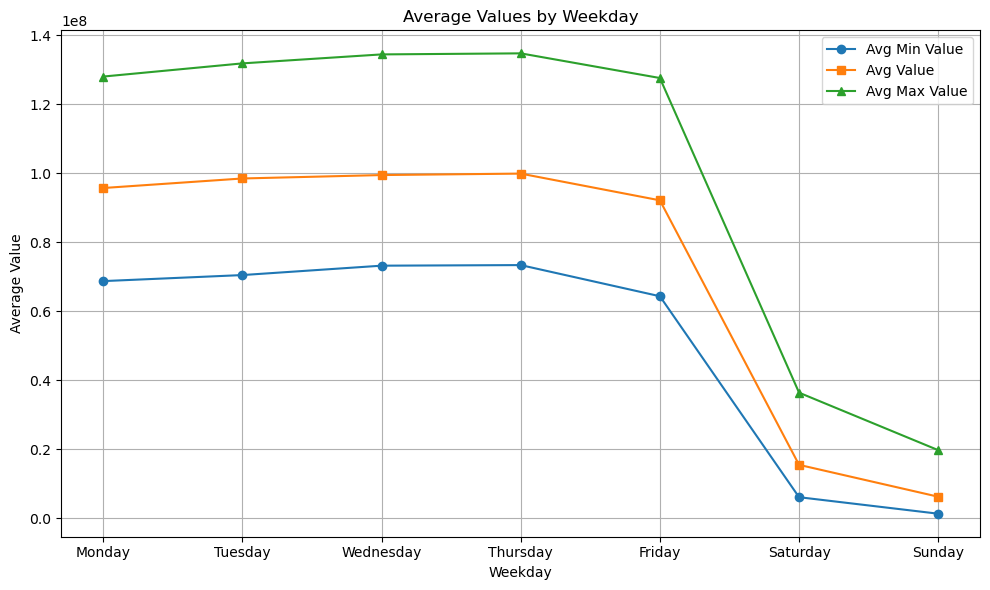

In [13]:
# Plotting averages of all values on a single line chart
plt.figure(figsize=(10, 6))

# Plot for each value type
plt.plot(weekly_avg.index, weekly_avg['value_min'], label='Avg Min Value', marker='o')
plt.plot(weekly_avg.index, weekly_avg['value_avg'], label='Avg Value', marker='s')
plt.plot(weekly_avg.index, weekly_avg['value_max'], label='Avg Max Value', marker='^')

plt.title('Average Values by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.tight_layout()

plt.show()

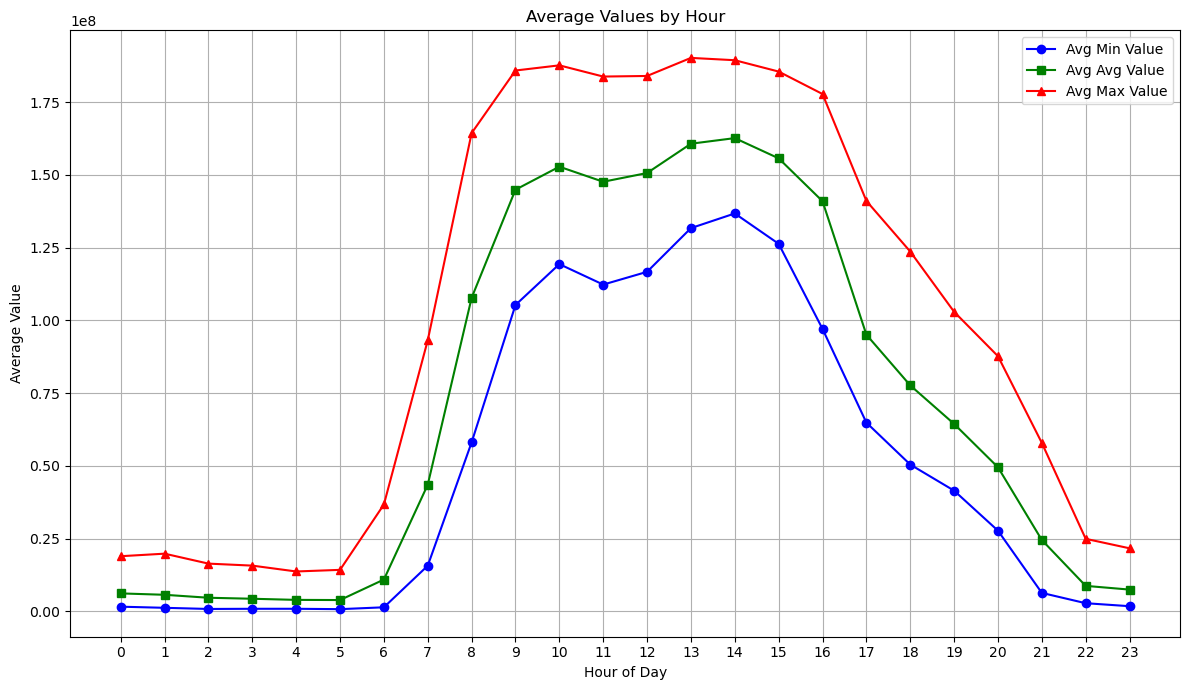

In [14]:
# Calculate hour from 'clock'
df_new['hour'] = df_new['clock'].dt.hour

# Group by hour and calculate mean for each value
hourly_avg = df_new.groupby('hour').mean()

# Plotting averages of all values on a single line chart by hour
plt.figure(figsize=(12, 7))

# Plot for each value type
plt.plot(hourly_avg.index, hourly_avg['value_min'], label='Avg Min Value', marker='o', linestyle='-', color='blue')
plt.plot(hourly_avg.index, hourly_avg['value_avg'], label='Avg Avg Value', marker='s', linestyle='-', color='green')
plt.plot(hourly_avg.index, hourly_avg['value_max'], label='Avg Max Value', marker='^', linestyle='-', color='red')

plt.title('Average Values by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(hourly_avg.index)
plt.grid(True)
plt.tight_layout()

plt.show()

# 特徵提取與選擇

In [15]:
df_extraction = df_new.drop(["itemid", "num"], axis=1)
df_extraction = df_extraction.rename({"clock": "DateTime"}, axis=1)

In [16]:
import holidays

# 創建巴西塞阿拉州的假日列表
br_holidays = holidays.Brazil(state='CE', years=2019)

# 過濾出2019年1月到7月的假日
filtered_holidays = {date: name for date, name in br_holidays.items() if date.month <= 7}

print(filtered_holidays)

{datetime.date(2019, 1, 1): 'Confraternização Universal', datetime.date(2019, 4, 19): 'Sexta-feira Santa', datetime.date(2019, 4, 21): 'Tiradentes', datetime.date(2019, 5, 1): 'Dia do Trabalhador', datetime.date(2019, 3, 19): 'São José', datetime.date(2019, 3, 25): 'Abolição da escravidão no Ceará'}


In [17]:
# 假期列表
holidays = {
    pd.Timestamp('2019-01-01'): 'Confraternização Universal',
    pd.Timestamp('2019-04-19'): 'Sexta-feira Santa',
    pd.Timestamp('2019-04-21'): 'Tiradentes',
    pd.Timestamp('2019-05-01'): 'Dia do Trabalhador',
    pd.Timestamp('2019-03-19'): 'São José',
    pd.Timestamp('2019-03-25'): 'Abolição da escravidão no Ceará'
}

# 將 DateTime 列轉換為日期（去除時間部分），以匹配假期
df_extraction["Date"] = df_extraction["DateTime"].dt.date

# 檢查每個日期是否為假期，並創建一個新的欄位 "holiday" 來表示
df_extraction["holiday"] = df_extraction["Date"].apply(lambda x: 1 if x in holidays else 0)

# 刪除臨時創建的 Date 欄位，恢復原始 DateTime 格式
df_extraction.drop("Date", axis=1, inplace=True)
df_extraction.set_index("DateTime", inplace=True)

df_extraction

,value_min,value_avg,value_max,weekday,hour,holiday
DateTime,,,,,,
2019-01-16 11:00:00-03:00,176234272,218584709,282860160,2,11,0
2019-01-16 12:00:00-03:00,175043128,239018429,302135312,2,12,0
2019-01-16 13:00:00-03:00,192060848,247729961,455722696,2,13,0
2019-01-16 14:00:00-03:00,185162976,222326142,268226440,2,14,0
2019-01-16 15:00:00-03:00,169504880,220546435,306695032,2,15,0
...,...,...,...,...,...,...
2019-07-15 05:00:00-03:00,183976,1146488,11797152,0,5,0
2019-07-15 06:00:00-03:00,333720,12801917,43525128,0,6,0
2019-07-15 07:00:00-03:00,29854256,73581269,121096792,0,7,0


## one-hot

In [19]:
# One-hot encoding for 'weekday' and 'hour'
df_weekday = pd.get_dummies(df_extraction['weekday'], prefix='weekday')
df_hour = pd.get_dummies(df_extraction['hour'], prefix='hour')

# Concatenate the original dataframe with the one-hot encoded columns
df_encoded = pd.concat([df_extraction, df_weekday, df_hour], axis=1)

df_encoded = df_encoded.drop(["weekday", "hour"], axis=1)
# Display the dataframe with one-hot encoded columns for demonstration
df_encoded["value_min"] = df_encoded["value_min"] / 1000000
df_encoded["value_avg"] = df_encoded["value_avg"] / 1000000
df_encoded["value_max"] = df_encoded["value_max"] / 1000000

df_encoded.to_csv("../../data/processed/campus_processed.csv")

## Create Dataset

In [18]:
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i, 1])
    return np.array(X), np.array(y)


# 假設 df_encoded 是你的 DataFrame，且已經按時間順序排序
n_steps = 8  # 例如，使用t以及前面5步作為特徵

X, y = create_dataset(df_encoded.to_numpy(), n_steps)

print(y)
print(X.shape)
print(y.shape)

[ 84.352362  54.736467  28.047113 ...  73.581269 156.333926 222.44631 ]
(4311, 8, 35)
(4311,)


## Split

In [42]:
# Total number of samples
total_samples = X.shape[0]

# Calculate the number of samples for each set
num_train = int(total_samples * 0.75)
num_validation = int(total_samples * 0.15)

# Calculate the indices for splitting
index_train = num_train
index_validation = index_train + num_validation

# Split the data based on calculated indices
X_train, X_validation, X_test = X[:index_train], X[index_train:index_validation], X[index_validation:]
y_train, y_validation, y_test = y[:index_train], y[index_train:index_validation], y[index_validation:]

# Verify the shapes of the splits
X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape

((3233, 8, 35), (646, 8, 35), (432, 8, 35), (3233,), (646,), (432,))

## Scaler

In [43]:
from sklearn.preprocessing import StandardScaler
def scaling(X_train, X_validation, X_test, num_features=4):
    # 初始化标准化器

    # 初始化用于存储缩放后的数据的变量
    X_train_scaled = np.copy(X_train)
    X_validation_scaled = np.copy(X_validation)
    X_test_scaled = np.copy(X_test)

    # 对每个特征进行标准化处理
    for i in range(num_features):
        scaler = StandardScaler()
        #scaler = MinMaxScaler()
        # 对训练数据进行标准化
        X_train_feature = X_train[:, :, i]  # 提取对应特征
        X_train_feature_scaled = scaler.fit_transform(X_train_feature.reshape(-1, 1)).reshape(X_train_feature.shape)
        X_train_scaled[:, :, i] = X_train_feature_scaled  # 将标准化后的数据放回

        #print(scaler.mean_)
        #print(scaler.scale_)
        # 对验证集和测试集使用相同的转换
        X_validation_feature = X_validation[:, :, i]
        X_validation_feature_scaled = scaler.transform(X_validation_feature.reshape(-1, 1)).reshape(X_validation_feature.shape)
        X_validation_scaled[:, :, i] = X_validation_feature_scaled

        X_test_feature = X_test[:, :, i]
        X_test_feature_scaled = scaler.transform(X_test_feature.reshape(-1, 1)).reshape(X_test_feature.shape)
        X_test_scaled[:, :, i] = X_test_feature_scaled
    return X_train_scaled, X_validation_scaled, X_test_scaled

In [44]:
X_train, X_validation, X_test = scaling(X_train, X_validation, X_test, 3)

## =====================

## Model

In [45]:
# 定义噪声添加的函数
def add_noise(data, noise_level=0.01):
    # 生成与数据形状相同的随机噪声
    noise = np.random.normal(loc=0.0, scale=noise_level, size=data.shape)
    # 仅对非0和非1的元素添加噪声
    noise_mask = (data != 0) & (data != 1)
    data_noisy = data.copy()
    data_noisy[noise_mask] += noise[noise_mask]
    return data_noisy

for i in range(len(X_train)): #每個X_train
  # 应用噪声
  X_train[i] = add_noise(X_train[i], noise_level=0.05)


In [46]:
!pip install keras-tcn > /dev/null 2>&1

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN  # Make sure you have installed the tcn package

In [48]:
from keras.layers import Conv1D, LSTM, MaxPooling1D

def build_model_cnn_lstm(look_back, n_features):
    model = Sequential()
    model.add(Conv1D(filters=2, kernel_size=2, activation='relu', input_shape=(look_back, n_features)))
    model.add(
        MaxPooling1D(pool_size=2, strides=1, padding="valid")
    )
    #model.add(LSTM(100, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

    # Summary of the model
    model.summary()
    return model

In [49]:
# def build_model_TCN(look_back, n_features):
#     model = Sequential()
#     model.add(TCN(input_shape=(look_back, n_features), return_sequences=False, kernel_size=2, nb_filters=64))
#     model.add(Dense(1))
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error')

#     # Summary of the model
#     model.summary()
#     return model
from tensorflow.keras.layers import Dense, Dropout

def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))  # RMSE 計算方式

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense

def build_model_GRU_with_Conv1D(look_back, n_features):
    model = Sequential()

    # Conv1D layer
    model.add(Conv1D(filters=2, kernel_size=2, activation='relu', input_shape=(look_back, n_features)))

    # First GRU layer
    model.add(GRU(100, activation='relu', return_sequences=True))

    # Second GRU layer
    model.add(GRU(100, activation='relu'))

    # Output layer
    model.add(Dense(1))

    # Compile with MAE
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mae')

    model.summary()
    return model


def build_model_TCN(look_back, n_features):
    model = Sequential()
    model.add(TCN(input_shape=(look_back, n_features),
                  return_sequences=False,
                  kernel_size=2,
                  nb_filters=64,
                  dilations=[1, 2, 4, 8, 16, 32],
                  padding='causal',
                  use_skip_connections=True,
                  activation='relu'))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=rmse)  # 設定 RMSE 作為損失函數

    model.summary()
    return model

def build_model_LSTM(look_back, n_features):
    model = Sequential()

    # 第一層 LSTM（回傳序列以便第二層 LSTM 接收）
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))

    # 第二層 LSTM（不回傳序列）
    model.add(LSTM(50, activation='relu'))

    # 輸出層
    model.add(Dense(1))

    # 編譯模型，使用 MSE
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse')

    model.summary()
    return model

def build_model_CNN_LSTM(look_back, n_features):
    model = Sequential()

    # 第一層 Conv1D + ReLU
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(look_back, n_features)))
    model.add(MaxPooling1D(pool_size=2))

    # 第二層 Conv1D + ReLU
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM 層
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(LSTM(64, activation='relu'))

    # 展平並輸出
    model.add(Flatten())
    model.add(Dense(1))  # 輸出層

    # 編譯模型，使用 MAE
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mae')

    model.summary()
    return model


def build_model_double_TCN(look_back, n_features):
    model = Sequential()
    model.add(TCN(input_shape=(look_back, n_features),
                  return_sequences=True,
                  kernel_size=2,
                  nb_filters=64,
                  dilations=[1, 2, 4, 8, 16, 32],
                  padding='causal',
                  use_skip_connections=True,
                  activation='relu'))
    model.add(TCN(input_shape=(look_back, n_features),
              return_sequences=False,
              kernel_size=2,
              nb_filters=64,
              dilations=[1, 2, 4, 8, 16, 32],
              padding='causal',
              use_skip_connections=True,
              activation='relu'))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=rmse)

    # Summary of the model
    model.summary()
    return model

In [50]:
model = build_model_double_TCN(n_steps, X_train.shape[2])

/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn_5 (TCN)                     │ (None, 8, 64)          │        97,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tcn_6 (TCN)                     │ (None, 64)             │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,009 (793.00 KB)

 Trainable params: 203,009 (793.00 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
import numpy as np
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_validation = np.array(X_validation, dtype=np.float32)
y_validation = np.array(y_validation, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]  # 加入早期停止回調函數
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 563ms/step - loss: 74.2452 - val_loss: 21.6542
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.1299 - val_loss: 16.6578
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 17.9602 - val_loss: 13.3108
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.3355 - val_loss: 14.9509
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.5386 - val_loss: 19.4285
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.7255 - val_loss: 12.6827
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.3671 - val_loss: 13.2635
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.7504 - val_loss: 14.1995
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.5197 - val_loss: 12.9900
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 14.8663 - val_loss: 12.0953
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.1211 - val_loss: 12.7398
Epoch 12/100
26/26 ━━━━━━━━━

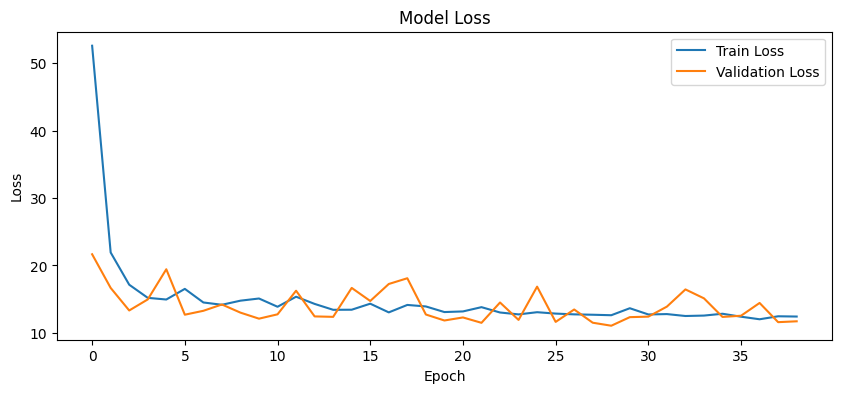

In [53]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Testing Length: 432
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step


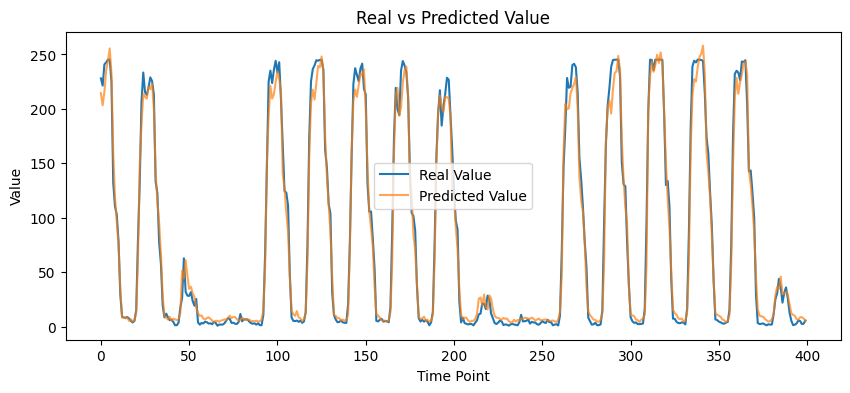

In [54]:
print(f"Testing Length: {len(y_test)}")
start = 000
end = 400
predicted = model.predict(X_test).reshape(-1, 1)
plt.figure(figsize=(10, 4))
plt.plot(y_test[start : end ], label='Real Value')
plt.plot(predicted[start: end ], label='Predicted Value', alpha=0.7)
plt.title('Real vs Predicted Value')
plt.ylabel('Value')
plt.xlabel('Time Point')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error
predicted = model.predict(X_test).reshape(-1, 1)
#save_data(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
#print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, predicted)
print(f'Mean Absolute Error: {mae}')
rmse = sqrt(mse)  # mse is the Mean Squared Error you already calculated
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, predicted)
print(f'R^2 Score: {r2}')
# print(f"MAPE: {mean_absolute_percentage_error(y_test, predicted)}")

#誤差範圍需要劃分

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error: 7.56744909286499
Root Mean Squared Error: 10.727904211539766
R^2 Score: 0.9867808818817139


In [ ]:
import os
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# 定義一個函式，強制從 _1 開始依序編號檔名
def get_unique_filename(filename):
    """
    不論檔案是否存在，皆從 _1 開始附加到檔名上，
    若有同樣編號的檔案存在，則依序累加編號，直到找到尚不存在的檔名。
    """
    base, ext = os.path.splitext(filename)
    i = 1
    unique_filename = f"{base}_{i}{ext}"
    while os.path.exists(unique_filename):
        i += 1
        unique_filename = f"{base}_{i}{ext}"
    return unique_filename

# ------------------------
# 對測試集進行預測及計算指標
# ------------------------

# 進行測試集預測並轉換成一維陣列
predicted_test = model.predict(X_test).reshape(-1, 1)

# 計算各項回歸評估指標
mse = mean_squared_error(y_test, predicted_test)
mae = mean_absolute_error(y_test, predicted_test)
rmse = sqrt(mse)
r2 = r2_score(y_test, predicted_test)
mape = mean_absolute_percentage_error(y_test, predicted_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'MAPE: {mape}')

# 將測試集真值與預測結果合併成 DataFrame
test_results = pd.DataFrame({
    'True': y_test.flatten(),
    'Predicted': predicted_test.flatten()
})

# 取得唯一檔名並儲存測試集結果成 CSV 檔案
test_csv_filename = get_unique_filename('test_predictions.csv')
test_results.to_csv(test_csv_filename, index=False)
print(f"測試集結果儲存到檔案: {test_csv_filename}")

# ------------------------
# 對訓練集進行預測並儲存結果
# ------------------------

# 預測訓練集資料
predicted_train = model.predict(X_train).reshape(-1, 1)

# 將訓練集真值與預測結果合併成 DataFrame
train_results = pd.DataFrame({
    'True': y_train.flatten(),
    'Predicted': predicted_train.flatten()
})

# 取得唯一檔名並儲存訓練集結果成 CSV 檔案
train_csv_filename = get_unique_filename('train_predictions.csv')
train_results.to_csv(train_csv_filename, index=False)
print(f"訓練集結果儲存到檔案: {train_csv_filename}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 147.22915649414062
Mean Absolute Error: 8.137767791748047
Root Mean Squared Error: 12.13380222741992
R^2 Score: 0.9828595519065857
MAPE: 0.5627568960189819
測試集結果儲存到檔案: test_predictions_5.csv
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
訓練集結果儲存到檔案: train_predictions_5.csv


# 結果分析

## 每小時誤差

In [ ]:
for index, row in df_extraction.iterrows():
  for i in range(len(y_test)):
    if (row["value_avg"]/1000000) == y_test[i]:
      df_extraction.loc[index, "predicted"] = predicted[i][0]

In [ ]:
df_extraction_hour = df_extraction.dropna()

In [ ]:
df_extraction_hour["value_avg"] = df_extraction_hour["value_avg"] / 1000000

In [ ]:
df_extraction_hour

,value_min,value_avg,value_max,weekday,hour,holiday
DateTime,,,,,,
2019-01-16 11:00:00-03:00,176234272,218.584709,282860160,2,11,0
2019-01-16 12:00:00-03:00,175043128,239.018429,302135312,2,12,0
2019-01-16 13:00:00-03:00,192060848,247.729961,455722696,2,13,0
2019-01-16 14:00:00-03:00,185162976,222.326142,268226440,2,14,0
2019-01-16 15:00:00-03:00,169504880,220.546435,306695032,2,15,0
...,...,...,...,...,...,...
2019-07-15 05:00:00-03:00,183976,1.146488,11797152,0,5,0
2019-07-15 06:00:00-03:00,333720,12.801917,43525128,0,6,0
2019-07-15 07:00:00-03:00,29854256,73.581269,121096792,0,7,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = df_extraction_hour.copy()

hours = data.groupby(data["hour"])

mae = hours.apply(lambda x: np.mean(np.abs(x['value_avg'] - x['predicted'])))
rmse = hours.apply(lambda x: np.sqrt(np.mean((x['value_avg'] - x['predicted'])**2)))
mape = hours.apply(lambda x: np.mean(np.abs((x['value_avg'] - x['predicted']) / x['value_avg'])) * 100)

print('MAE for each hour:')
print(mae)
print('\nRMSE for each hour:')
print(rmse)
print('\nMAPE for each hour:')
print(mape)

hours = range(24)
plt.figure(figsize=(12, 6))
plt.plot(hours, mae, label='MAE')
plt.plot(hours, rmse, label='RMSE')
plt.plot(hours, mape, label='MAPE')
plt.xlabel('Hour')
plt.ylabel('Error')
plt.title('MAE, RMSE and MAPE for each hour')
plt.xticks(hours)
plt.legend()
plt.show()

KeyError: 'predicted'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = df_extraction_hour.copy()

hours = data.groupby(data["weekday"])

mae = hours.apply(lambda x: np.mean(np.abs(x['value_avg'] - x['predicted'])))
rmse = hours.apply(lambda x: np.sqrt(np.mean((x['value_avg'] - x['predicted'])**2)))
mape = hours.apply(lambda x: np.mean(np.abs((x['value_avg'] - x['predicted']) / x['value_avg'])) * 100)

print('MAE for each hour:')
print(mae)
print('\nRMSE for each hour:')
print(rmse)
print('\nMAPE for each hour:')
print(mape)

hours = range(7)
plt.figure(figsize=(12, 6))
plt.plot(hours, mae, label='MAE')
plt.plot(hours, rmse, label='RMSE')
plt.plot(hours, mape, label='MAPE')
plt.xlabel('Hour')
plt.ylabel('Error')
plt.title('MAE, RMSE and MAPE for each weekday')
plt.xticks(hours)
plt.legend()
plt.show()

KeyError: 'predicted'